In [16]:
import os

In [17]:
# data_dir = 'C:\\Users\\ca25935\\Desktop\\UCD Data Analytics\\Final Project\\Final Project\\Fonts\\Test Collection\\'
data_dir = 'Test Collection'

In [55]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'app.py',
 'debug.log',
 'Font Classifier.ipynb',
 'Font_detector.h5',
 'README.md',
 'resources.txt',
 'server.log',
 'templates',
 'Test Collection',
 'uploads',
 'upload_image.html']

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
from matplotlib.image import imread

In [21]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [22]:
test_path

'Test Collection\\test\\'

In [23]:
os.listdir(test_path)

['AguafinaScript-Regular', 'arial']

In [24]:
os.listdir(train_path)

['AguafinaScript-Regular', 'arial']

In [25]:
os.listdir(train_path+'AguafinaScript-Regular')[0]

'0 - Copy (10).jpg'

In [26]:
Aguafina_font = train_path+'AguafinaScript-Regular\\'+'0.jpg'

In [27]:
Aguafina_font

'Test Collection\\train\\AguafinaScript-Regular\\0.jpg'

In [28]:
Aguafina_font = imread(Aguafina_font)

In [29]:
Aguafina_font.shape
#3 means it's a color image (RGB)

(300, 300, 3)

In [30]:
Aguafina_font

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

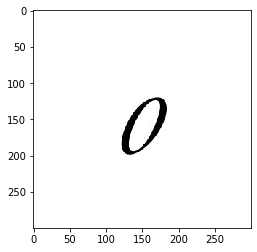

In [31]:
plt.imshow(Aguafina_font)

In [32]:
os.listdir(train_path)

['AguafinaScript-Regular', 'arial']

In [33]:
os.listdir(train_path+'arial')[0]

'0 - Copy (10).jpg'

In [34]:
arial_font = train_path+'arial\\'+'0.jpg'

In [35]:
arial_font

'Test Collection\\train\\arial\\0.jpg'

In [36]:
arial_font = imread(arial_font)

In [37]:
arial_font

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

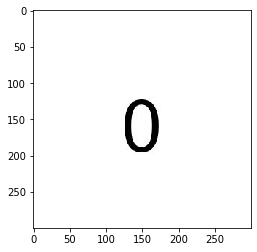

In [38]:
plt.imshow(arial_font)

In [39]:
#present working directory
# pwd


In [40]:
len(os.listdir(train_path+'AguafinaScript-Regular'))

803

In [41]:
len(os.listdir(train_path+'arial'))

803

In [42]:
len(os.listdir(test_path+'AguafinaScript-Regular'))

73

In [43]:
len(os.listdir(test_path+'arial'))

73

In [44]:
test = os.listdir(test_path+"AguafinaScript-Regular")
test

['0.jpg',
 '1.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 'amp.jpg',
 'at.jpg',
 'collan.jpg',
 'c_A.jpg',
 'c_B.jpg',
 'c_C.jpg',
 'c_D.jpg',
 'c_E.jpg',
 'c_F.jpg',
 'c_G.jpg',
 'c_H.jpg',
 'c_I.jpg',
 'c_J.jpg',
 'c_K.jpg',
 'c_L.jpg',
 'c_M.jpg',
 'c_N.jpg',
 'c_O.jpg',
 'c_P.jpg',
 'c_Q.jpg',
 'c_R.jpg',
 'c_S.jpg',
 'c_T.jpg',
 'c_U.jpg',
 'c_V.jpg',
 'c_W.jpg',
 'c_X.jpg',
 'c_Y.jpg',
 'c_Z.jpg',
 'dash.jpg',
 'dollar.jpg',
 'dot.jpg',
 'LB.jpg',
 'percentage.jpg',
 'questionmark.jpg',
 'RB.jpg',
 'semicollan.jpg',
 's_a.jpg',
 's_b.jpg',
 's_c.jpg',
 's_d.jpg',
 's_e.jpg',
 's_f.jpg',
 's_g.jpg',
 's_h.jpg',
 's_i.jpg',
 's_j.jpg',
 's_k.jpg',
 's_l.jpg',
 's_m.jpg',
 's_n.jpg',
 's_o.jpg',
 's_p.jpg',
 's_q.jpg',
 's_r.jpg',
 's_s.jpg',
 's_t.jpg',
 's_u.jpg',
 's_v.jpg',
 's_w.jpg',
 's_x.jpg',
 's_y.jpg',
 's_z.jpg']

In [45]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+"AguafinaScript-Regular"):
    
    img = imread(test_path+"AguafinaScript-Regular\\"+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

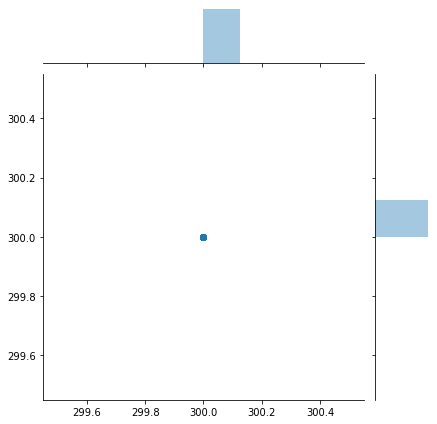

In [46]:
sns.jointplot(dim1,dim2)

In [47]:
#find the average size of the images to choose what images to work with
np.mean(dim1)

300.0

In [48]:
np.mean(dim2)

300.0

In [49]:
image_shape = (300,300,3)

In [58]:
image_shape[:2]

(300, 300)

In [34]:
#rotation, resizing, scaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
# help(ImageDataGenerator)
#if need to rescale use 1/255
#for example check the min/max
# uninfected_cell.min()
# uninfected_cell.max()
# imread(para_cell).min()
# imread(para_cell).max()

In [36]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

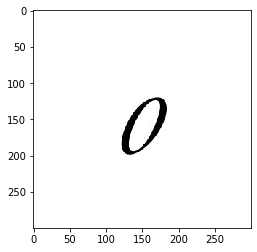

In [37]:
para_img = Aguafina_font
plt.imshow(para_img)

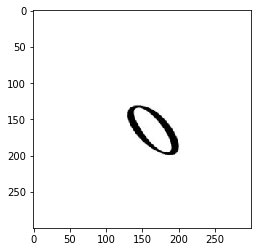

In [38]:
plt.imshow(image_gen.random_transform(para_img))

In [39]:
train_path

'Test Collection\\train\\'

In [40]:
image_gen.flow_from_directory(train_path)

Found 1606 images belonging to 2 classes.


In [41]:
image_gen.flow_from_directory(test_path)

Found 146 images belonging to 2 classes.


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,Activation

In [43]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [47]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module keras_preprocessing.image.image_data_generator:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest') method of tensorflow.python.keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    # Arguments
        directory: string, path to the target directory.
            It should contain one subdirectory per class.
            Any PNG, JPG, BMP, PPM or TIF images
            inside each of the subdirectories directory tree
            will be included in the generator.
            See [this script](
            https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
            for more details.
        target_size: Tuple of integers `(height, width

In [48]:
batch_size = 16

In [49]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 1606 images belonging to 2 classes.


In [50]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 146 images belonging to 2 classes.


In [51]:
train_image_gen.class_indices

{'AguafinaScript-Regular': 0, 'arial': 1}

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
results = model.fit(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 101 steps, validate for 10 steps
Epoch 1/20
101/101 [==============================] - 161s 2s/step - loss: 16.7628 - accuracy: 0.6463 - val_loss: 0.4957 - val_accuracy: 0.7740
Epoch 2/20
101/101 [==============================] - 128s 1s/step - loss: 0.5571 - accuracy: 0.7833 - val_loss: 0.4673 - val_accuracy: 0.8425
Epoch 3/20
101/101 [==============================] - 128s 1s/step - loss: 0.3871 - accuracy: 0.8736 - val_loss: 0.3434 - val_accuracy: 0.9041
Epoch 4/20
101/101 [==============================] - 128s 1s/step - loss: 0.3240 - accuracy: 0.8904 - val_loss: 0.4463 - val_accuracy: 0.7808
Epoch 5/20
101/101 [==============================] - 128s 1s/step - loss: 0.2496 - accuracy: 0.9197 - val_loss: 0.1517 - val_accuracy: 0.9589
Epoch 6/20
101/101 [==============================] - 128s 1s/step - loss: 0.2082 - accuracy: 0.9340 - val_loss: 0.1549 - val_accuracy: 0.9589
Epoch 7/20
101/101 [============================

In [54]:
from tensorflow.keras.models import load_model
model.save('Font_detector.h5')

In [55]:
# if you wanted to load existing model
# model = load_model('Font_detector.h5')

In [56]:
#model training history

model.history.history

{'loss': [16.862133234924872,
  0.5581389978472352,
  0.3859595389918402,
  0.31697138383112394,
  0.24982295852446765,
  0.20749137369663007,
  0.16218988098213413,
  0.1687757481692143,
  0.15357196485046135],
 'accuracy': [0.6463263,
  0.78331256,
  0.873599,
  0.89041096,
  0.9196762,
  0.9339975,
  0.9520548,
  0.9464508,
  0.94956416],
 'val_loss': [0.49569065421819686,
  0.46730903089046477,
  0.3434366673231125,
  0.4462650611996651,
  0.151675463328138,
  0.15490427017211914,
  0.12522939322516322,
  0.15336359223583712,
  0.17490588447544725],
 'val_accuracy': [0.77397263,
  0.84246576,
  0.9041096,
  0.7808219,
  0.9589041,
  0.9589041,
  0.9589041,
  0.93835616,
  0.9520548]}

In [57]:
losses = pd.DataFrame(model.history.history)

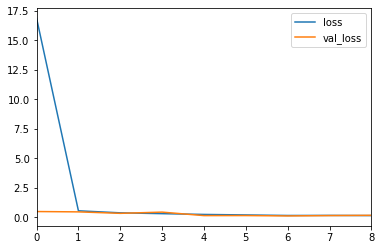

In [58]:
losses[['loss','val_loss']].plot()

In [59]:
model.metrics_names

['loss', 'accuracy']

In [60]:
pred = model.predict(test_image_gen)

In [61]:
pred

array([[0.09728965],
       [0.03484551],
       [0.60634017],
       [0.04642475],
       [0.99782085],
       [0.67362136],
       [0.03187313],
       [0.77615625],
       [0.03187313],
       [0.0146467 ],
       [0.03187313],
       [0.03187313],
       [0.05765114],
       [0.13939568],
       [0.03187313],
       [0.03187313],
       [0.03369894],
       [0.03187313],
       [0.0921725 ],
       [0.14079909],
       [0.04347132],
       [0.03187313],
       [0.03187313],
       [0.03187313],
       [0.03187313],
       [0.05007108],
       [0.0292509 ],
       [0.0329039 ],
       [0.03610481],
       [0.03187313],
       [0.17256421],
       [0.03187313],
       [0.03187313],
       [0.18971108],
       [0.03187313],
       [0.03187313],
       [0.03187313],
       [0.26619047],
       [0.60122997],
       [0.2852358 ],
       [0.03187313],
       [0.03187313],
       [0.09313722],
       [0.03187313],
       [0.03187313],
       [0.03187313],
       [0.03187313],
       [0.031

In [62]:
from tensorflow.keras.preprocessing import image

In [63]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict(test_image_gen)

In [64]:
pred_probabilities

array([[0.04012943],
       [0.03940167],
       [0.9228285 ],
       [0.09430508],
       [0.9602694 ],
       [0.64804864],
       [0.03187313],
       [0.68419063],
       [0.04319391],
       [0.09599397],
       [0.03187313],
       [0.03187313],
       [0.03187313],
       [0.441567  ],
       [0.04137309],
       [0.03187313],
       [0.14897491],
       [0.10253012],
       [0.04497255],
       [0.03366717],
       [0.03970535],
       [0.1964551 ],
       [0.04927442],
       [0.02675143],
       [0.12795195],
       [0.16142602],
       [0.03187313],
       [0.03278613],
       [0.12014028],
       [0.03187313],
       [0.2843589 ],
       [0.03187313],
       [0.13966823],
       [0.29332295],
       [0.0820452 ],
       [0.03251652],
       [0.03291473],
       [0.11563091],
       [0.2086984 ],
       [0.41665238],
       [0.03187313],
       [0.03187313],
       [0.03352686],
       [0.03187313],
       [0.03187313],
       [0.21446015],
       [0.03187313],
       [0.033

In [65]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [66]:
predictions = pred_probabilities > 0.5

In [67]:
predictions

array([[False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        73
           1       0.95      0.97      0.96        73

    accuracy                           0.96       146
   macro avg       0.96      0.96      0.96       146
weighted avg       0.96      0.96      0.96       146



In [70]:
#to see how many we are misclassifying
confusion_matrix(test_image_gen.classes,predictions)

array([[69,  4],
       [ 2, 71]], dtype=int64)

# Predicting on a image!

In [71]:
Aguafina_font

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [72]:
from tensorflow.keras.preprocessing import image

In [73]:
# my_image = image.load_img(Aguafina_font,target_size=image_shape)
my_image = Aguafina_font

In [74]:
my_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [75]:
#to see the type of file
# type(image.load_img(para_cell))

In [76]:
# to examine the model we are working with
# model.summary()

In [77]:
my_img_arr = image.img_to_array(my_image)

In [78]:
my_image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [79]:
my_img_arr

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [80]:
# check the shape of the image array
#we want the shape to be (1,130,130,3) adding a new column because the model expects batch number
my_img_arr.shape 

(300, 300, 3)

In [81]:
my_img_arr = np.expand_dims(my_img_arr, axis=0)

In [82]:
my_img_arr.shape

(1, 300, 300, 3)

In [83]:
#pass the image array to the model for a prediction
model.predict(my_img_arr)

array([[0.03187313]], dtype=float32)

In [84]:
pred_score=train_image_gen.class_indices
pred_score

{'AguafinaScript-Regular': 0, 'arial': 1}